# **Cài đặt thư viện và đọc file dữ liệu**

In [ ]:
#Import các thư viện
import pandas as pd
import seaborn as sns
import matplotlib.pyplot         as plt

import statsmodels.api           as sm
import scipy.stats               as stats
from statsmodels.formula.api     import ols
from statsmodels.stats.weightstats import ztest

In [ ]:
#Đọc file dữ liệu
df = pd.read_csv('/content/us_health_insurance_cleaned.csv')
df.head()

,CusID,age,is_male,married,num_of_children,bmi,smoker,state,region,employ,most_recent_insur_pur,insur_renewals,charges,invalid_date
0,CS619,64,0,1,2,47.600,0,California,West,1,4/21/2022,51,328644,False
1,CS146,64,1,0,0,17.320,1,West Virginia,South,0,10/28/2007,12,78030,False
2,CS224,64,1,0,0,16.400,1,Florida,Southeast,0,4/4/2009,10,68234,False
3,CS949,64,1,1,0,36.955,0,New York,Northeast,1,1/22/2018,51,436356,False
4,CS265,64,0,1,1,38.665,0,New York,Northeast,1,11/10/2019,44,376464,False


#**1. Kiểm định ANOVA one way: Các bang ở các vùng khác nhau có xu hướng mua bảo hiểm khác nhau không**

# ANOVA one way //Box Plot

In [ ]:
#Các giá trị cảu biến region
region = df["region"].unique()
print(region)

['West' 'South' 'Southeast' 'Northeast' 'Midwest']


In [ ]:
#Tạo dataframe chứa dữ liệu 2 cột
df1 = df[["region", "insur_renewals"]]
df2 = df1.pivot(columns = "region", values = "insur_renewals" )
new_order = ['West', 'South' ,'Southeast', 'Northeast' ,'Midwest']
df2 = df2[new_order]

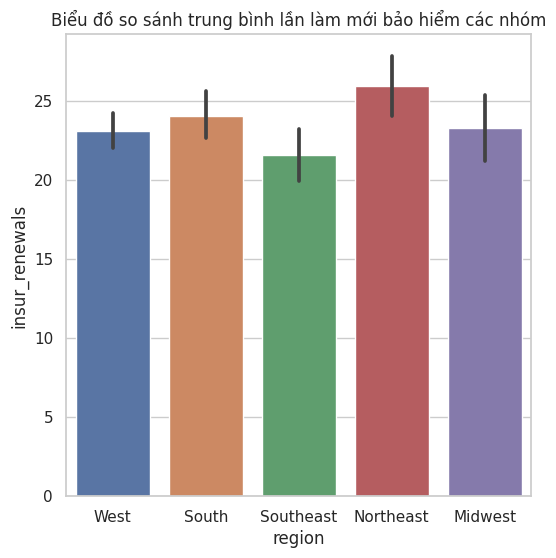

In [ ]:
plt.figure(figsize = (6, 6))
plt.title('Biểu đồ so sánh trung bình lần làm mới bảo hiểm các nhóm')
sns.barplot(x = df1["region"], y = df1["insur_renewals"])
plt.show()

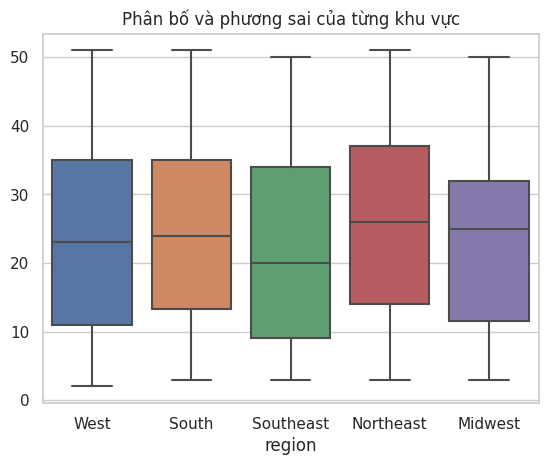

In [ ]:
#Box plot thể hiện phân bố và phương sai của từng bang
plt.title("Phân bố và phương sai của từng khu vực")
sns.boxplot( data = df2)
plt.show()

In [ ]:
#Mức ý nghĩa alpha = 0.05
alpha = 0.05

#Tách các khu vực thành các cột dữ liệu
West = df2["West"].dropna()
Midwest = df2["Midwest"].dropna()
Northeast = df2["Northeast"].dropna()
South =df2["South"].dropna()
Southeast = df2["Southeast"].dropna()

#Kiểm định ANOVA
f, p = stats.f_oneway(West, Midwest, Northeast, South, Southeast)
if (p < alpha):
    print(f'* Trị số p = {p:.4f} < {alpha:.4f} cho nên bác bỏ H0 ==> có sự khác biệt giữa các khu vực ')
else:
    print(f'* Trị số p = {p:.4f} >= {alpha:.4f} cho nên KHÔNG bác bỏ H0 ==> KHÔNG có sự khác biệt giữa các khu vực')


* Trị số p = 0.0097 < 0.0500 cho nên bác bỏ H0 ==> có sự khác biệt giữa các khu vực 


In [ ]:
df2.describe()

region,Midwest,Northeast,South,Southeast,West
count,130.000000,184.000000,262.000000,232.000000,505.000000
mean,23.276923,25.978261,24.080153,21.577586,23.091089
std,12.259478,13.011116,12.490505,12.800603,12.752669
min,3.000000,3.000000,3.000000,3.000000,2.000000
25%,11.500000,14.000000,13.250000,9.000000,11.000000
50%,25.000000,26.000000,24.000000,20.000000,23.000000
75%,32.000000,37.000000,35.000000,34.000000,35.000000
max,50.000000,51.000000,51.000000,50.000000,51.000000


In [ ]:
#Bảng Anova
model       = ols('insur_renewals ~ region', data = df1).fit()
anova_table = sm.stats.anova_lm(model)

anova_table

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,2162.461612,540.615403,3.352834,0.009673
Residual,1308.0,210903.673956,161.241341,NaN,NaN



# **2. Kiểm định giả thuyết: Chỉ số sức khỏe BMI không làm ảnh hưởng đến quyết định làm mới bảo hiểm của khách hàng**
# Z_test // Distribution plot

In [ ]:
df_stand = df.loc[ (18.5 < df["bmi"]) & (df["bmi"] < 24.9)]
df_nstand = df.loc[(18.5 >= df["bmi"]) | (df["bmi"] >= 24.9)]

bmi_stand = df_stand["insur_renewals"]
bmi_nstand = df_nstand["insur_renewals"]


In [ ]:
print(f'Độ lệch chuẩn của tập chỉ số sức khỏe bình thường: {bmi_stand.std():.4f}')
print(f'Độ lệch chuẩn của tập chỉ số sức khỏe dưới và quá tiêu chuẩn: {bmi_nstand.std():.4f}')
print(f'Độ chênh lệch của std: {abs(bmi_stand.std()-bmi_nstand.std()):4f}' )

Độ lệch chuẩn của tập chỉ số sức khỏe bình thường:Z 12.8949
Độ lệch chuẩn của tập chỉ số sức khỏe dưới và quá tiêu chuẩn: 12.0846
Độ chênh lệch của std: 0.810308


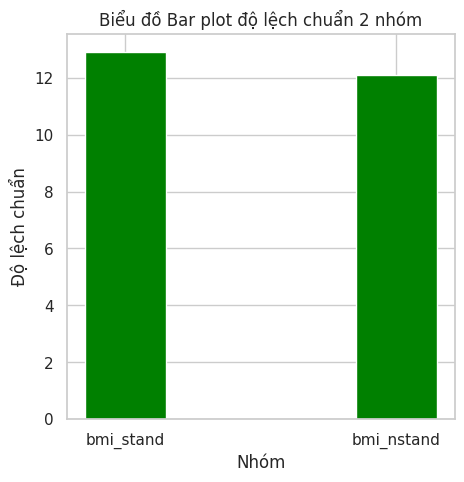

In [ ]:
bar_plot = {'bmi_stand' : bmi_stand.std(ddof = 1 ), 'bmi_nstand': bmi_nstand.std(ddof = 1)}
courses = list(bar_plot.keys())
values = list(bar_plot.values())

fig = plt.figure(figsize = (5, 5))


plt.bar(courses, values, color ='green',  width = 0.3)

plt.xlabel("Nhóm")
plt.ylabel("Độ lệch chuẩn")
plt.title("Biểu đồ Bar plot độ lệch chuẩn 2 nhóm")
plt.show()

In [ ]:
print(f'Số quan sát của mẫu bmi chuẩn: {bmi_stand.shape[0]}// Giá trị trung bình: {bmi_stand.mean():.4f} ')
print(f'So quan sát của mẫu bmi không chuẩn: {bmi_nstand.shape[0]}// Giá trị trung bình: {bmi_nstand.mean():.4f} ')

Số quan sát của mẫu bmi chuẩn: 349// Giá trị trung bình: 17.9083 
So quan sát của mẫu bmi không chuẩn: 964// Giá trị trung bình: 25.4481 


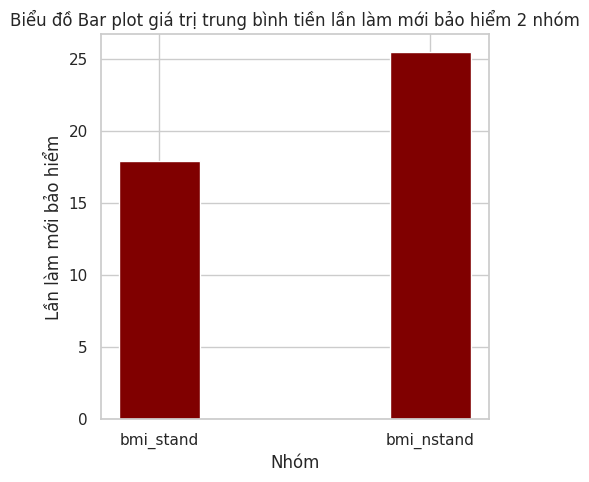

In [ ]:
bar_plot = {'bmi_stand' : bmi_stand.mean(), 'bmi_nstand': bmi_nstand.mean()}
fig = plt.figure(figsize = (5, 5))
plt.bar(courses, values, color ='maroon',  width = 0.3)
courses = list(bar_plot.keys())
values = list(bar_plot.values())
plt.xlabel("Nhóm")
plt.ylabel("Lần làm mới bảo hiểm")
plt.title("Biểu đồ Bar plot giá trị trung bình tiền lần làm mới bảo hiểm 2 nhóm")
plt.show()

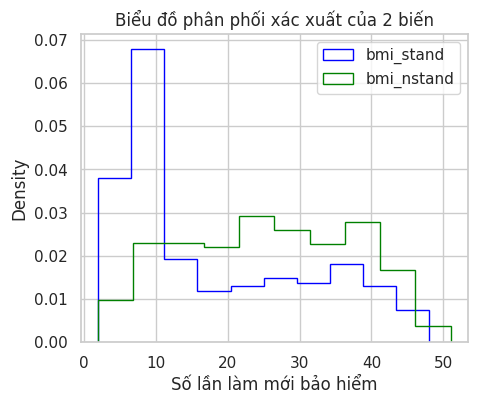

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 4))

plt.hist(bmi_stand, density = True, histtype = 'step', color = 'blue')
plt.hist(bmi_nstand,  density = True, histtype = 'step', color = 'green')


plt.xlabel('Số lần làm mới bảo hiểm')
plt.ylabel('Density')
plt.title('Biểu đồ phân phối xác xuất của 2 biến')

plt.gca().legend(('bmi_stand','bmi_nstand'))

plt.show()


In [ ]:
alpha = 0.05
T1, p1 = ztest(bmi_stand, value = bmi_nstand.mean())

In [ ]:
if (p1 < alpha):
    print(f'Trị số p = {p1:} < {alpha:.4f} bác bỏ H0 ==> Chỉ số bmi có ảnh hưởng đến quyết định làm mới bảo hiểm')
else:
    print(f'Trị số p = {p1:} >= {alpha:.4f} KHÔNG bác bỏ H0 => Chỉ số bmi không ảnh hưởng đến quyết định làm mới bảo hiểm ')

Trị số p = 8.915994860989547e-28 < 0.0500 bác bỏ H0 ==> Chỉ số bmi có ảnh hưởng đến quyết định làm mới bảo hiểm


# **3. Kiểm định giả thuyết: Người nghiện thuốc lá có khả năng làm mới bảo hiểm y tế nhiều hơn người không nghiện?**
# T_test // Bar chart


In [ ]:
smoker = df.loc[df["smoker"] ==1]["charges"]
nsmoker = df.loc[df["smoker"]==0]["charges"]

In [ ]:
print(f'Độ lệch chuẩn của tập người nghiện thuốc: {smoker.std(ddof = 1):.4f}')
print(f'Độ lệch chuẩn của tập người không nghiện thuốc: {nsmoker.std(ddof =1):.4f}')
print(f'Độ chênh lệch của std: {abs(smoker.std()-nsmoker.std()):4f}' )

Độ lệch chuẩn của tập người nghiện thuốc: 89175.3702
Độ lệch chuẩn của tập người không nghiện thuốc: 92639.8198
Độ chênh lệch của std: 3464.449557


<ipython-input-18-7aaf5af85470>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(smoker, kde = True, norm_hist = True, hist = False)
<ipython-input-18-7aaf5af85470>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nsmoker, kde = True, norm_hist = True, hist = False)


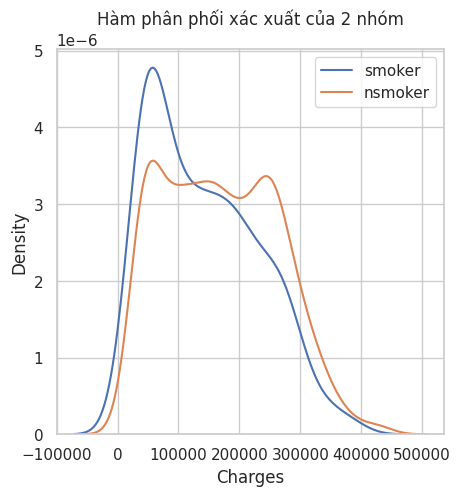

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))

sns.distplot(smoker, kde = True, norm_hist = True, hist = False)
sns.distplot(nsmoker, kde = True, norm_hist = True, hist = False)

# Thêm nhãn và tên 2 trục
plt.xlabel('Charges')
plt.ylabel('Density')
plt.title('Hàm phân phối xác xuất của 2 nhóm')

#Thêm chứ thích
plt.gca().legend(('smoker','nsmoker'))

#Hiển thị đồ thị
plt.show()

In [ ]:
print(f'Số quan sát của mẫu người nghiện thuốc: {smoker.shape[0]}// Giá trị trung bình: {smoker.mean():.4f} ')
print(f'Số quan sát của mẫu người không nghiện thuốc: {nsmoker.shape[0]}// Giá trị trung bình: {nsmoker.mean():.4f} ')

Số quan sát của mẫu người nghiện thuốc: 360// Giá trị trung bình: 141753.0556 
Số quan sát của mẫu người không nghiện thuốc: 953// Giá trị trung bình: 168799.7817 


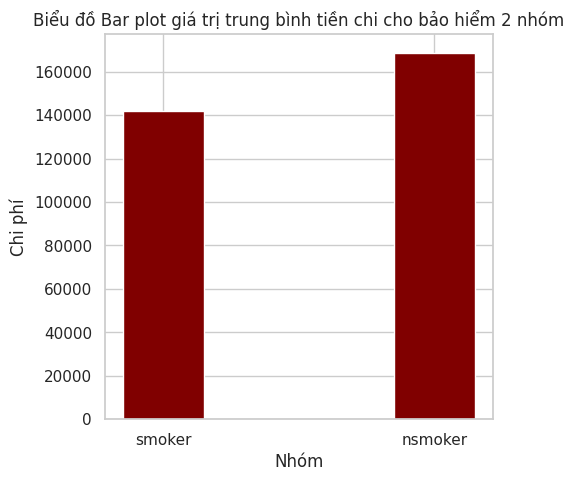

In [ ]:
bar_plot = {'smoker' : smoker.mean(), 'nsmoker': nsmoker.mean()}
courses = list(bar_plot.keys())
values = list(bar_plot.values())

fig = plt.figure(figsize = (5, 5))


plt.bar(courses, values, color ='maroon',  width = 0.3)

plt.xlabel("Nhóm")
plt.ylabel("Chi phí")
plt.title("Biểu đồ Bar plot giá trị trung bình tiền chi cho bảo hiểm 2 nhóm")
plt.show()


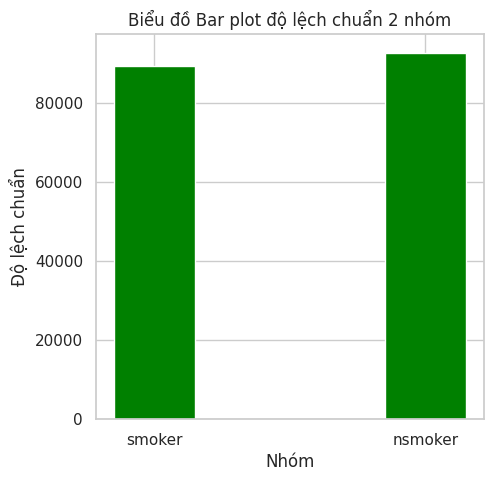

In [ ]:
bar_plot = {'smoker' : smoker.std(ddof = 1 ), 'nsmoker': nsmoker.std(ddof = 1)}
courses = list(bar_plot.keys())
values = list(bar_plot.values())

fig = plt.figure(figsize = (5, 5))


plt.bar(courses, values, color ='green',  width = 0.3)

plt.xlabel("Nhóm")
plt.ylabel("Độ lệch chuẩn")
plt.title("Biểu đồ Bar plot độ lệch chuẩn 2 nhóm")
plt.show()

In [ ]:
alpha = 0.05
T2, p2 = ztest(smoker, value = nsmoker.mean(), alternative = "larger")

In [ ]:
ztest(smoker, value = nsmoker.mean(), alternative = "larger")

(-5.75467807776055, 0.9999999956596471)

In [ ]:
if (p2 < alpha):
    print(f'Trị số p = {p2:} < {alpha:.4f} bác bỏ H0 ==> Người nghiện co xu hướnng chi nhiều hơn cho bảo hiểm y tế')
else:
    print(f'Trị số p = {p2:} >= {alpha:.4f} KHÔNG bác bỏ H0 ==> Người nghiện có xu hướng chi ít hơn cho bảo hiểm y tế')

Trị số p = 0.9999999956596471 >= 0.0500 KHÔNG bác bỏ H0 ==> Người nghiện có xu hướng chi ít hơn cho bảo hiểm y tế


# **4. Kiểm định giả thuyết: Yếu tố gia đình có làm ảnh hưởng đến việc chi trả bảo hiểm**

In [ ]:
married = df.loc[df["married"] ==1]["charges"]
nmarried = df.loc[df["married"] ==0]["charges"]

In [ ]:
print(f'Độ lệch chuẩn của tập người có gia đình: {married.std(ddof = 1):.4f}')
print(f'Độ lệch chuẩn của tập người không có gia đình: {nmarried.std(ddof =1):.4f}')
print(f'Độ chênh lệch của std: {abs(married.std()-nmarried.std()):4f}' )

Độ lệch chuẩn của tập người có gia đình: 88684.7536
Độ lệch chuẩn của tập người không có gia đình: 37545.4187
Độ chênh lệch của std: 51139.334894


In [ ]:
bar_plot = {'married' : married.std(ddof = 1 ), 'nmarried': nmarried.std(ddof = 1)}
fig = plt.figure(figsize = (5, 5))
courses = list(bar_plot.keys())
values = list(bar_plot.values())
plt.bar(courses, values, color ='green',  width = 0.3)
plt.xlabel("Nhóm")
plt.ylabel("Độ lệch chuẩn")
plt.title("Biểu đồ Bar plot độ lệch chuẩn 2 nhóm")
plt.show()

In [ ]:
print(f'Số quan sát của mẫu người có gia đình: {married.shape[0]}// Giá trị trung bình: {married.mean():.4f} ')
print(f'Số quan sát của mẫu người không có gia đình: {nmarried.shape[0]}// Giá trị trung bình: {nmarried.mean():.4f} ')

Số quan sát của mẫu người có gia đình: 851// Giá trị trung bình: 201443.2021 
Số quan sát của mẫu người không có gia đình: 462// Giá trị trung bình: 87595.5130 


In [ ]:
bar_plot = {'married' : married.mean(), 'nmarried': nmarried.mean()}
fig = plt.figure(figsize = (5, 5))
courses = list(bar_plot.keys())
values = list(bar_plot.values())
plt.bar(courses, values, color ='maroon',  width = 0.3)

plt.xlabel("Nhóm")
plt.ylabel("Chi phí")
plt.title("Biểu đồ Bar plot giá trị trung bình tiền chi cho bảo hiểm 2 nhóm")
plt.show()


In [ ]:
alpha = 0.05
T3, p3 = ztest(married, value = nmarried.mean())
ztest(married, value = nmarried.mean())

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 4))

plt.hist(married, density = True, histtype = 'step', color = 'blue')
plt.hist(nmarried,  density = True, histtype = 'step', color = 'green')


plt.xlabel('Tổng số tiền chi cho bảo hiểm')
plt.ylabel('Density')
plt.title('Biểu đồ phân phối xác xuất của 2 biến')

plt.gca().legend(('married','nmarried'))

plt.show()


In [ ]:
if (p3 < alpha):
    print(f'Trị số p = {p3:} < {alpha:.4f} bác bỏ H0 ==> Yếu tố hôn nhân có ảnh hưởng đến quyết định làm mới bảo hiểm')
else:
    print(f'Trị số p = {p3:} >= {alpha:.4f} KHÔNG bác bỏ H0 => Yếu tố hôn nhân không ảnh hưởng đến quyết định làm mới bảo hiểm ')